In [1]:
from scripts.morph_aux import *

In [2]:
TRIGRAMS_FILE = "data/ngrams/filtered_n3grams.tsv"
VERIFIED_TEXT_WORDS_FILE = "data/verified_texts/words.csv"
VERIFIED_TEXT_DISAMED_FILE = "data/verified_texts/disamed.csv"

# 5gram disamed training set

In [3]:
rawdata = load_validation_data(VERIFIED_TEXT_DISAMED_FILE, VERIFIED_TEXT_WORDS_FILE)

In [13]:
disamed_data = []
for row in rawdata:
    disamed_data.append((row[1] + row[2] + row[4] + row[5], row[3]))

In [24]:
import random
random.shuffle(data)

test = disamed_data[:len(disamed_data)/10]
train = disamed_data[len(disamed_data)/10:]
print("Train set length: %s\nTest set length: %s" % (len(train), len(test)))

Train set length: 20036
Test set length: 2226


In [25]:
X = [row[0] for row in train]
Y = [row[1][1] for row in train]

In [7]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(220), random_state=1)

clf.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=220, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [39]:
from sklearn.neural_network import MLPClassifier
clf12 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(106), random_state=1)

clf12.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=106, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [36]:
from sklearn.neural_network import MLPClassifier
clf13 = MLPClassifier(solver='sgd', alpha=1e-5,
                      hidden_layer_sizes=(106, 53), 
                      learning_rate='adaptive',
                      random_state=1,
                      max_iter=400)

clf13.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(106, 53), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Test

In [8]:
err, lenX, lenA = testit_val_with_h(test, clf, 1)
print("%s\t%s\t%s" % (err, lenX, lenA))
if lenA > 0:
    print('Accuracy (h=1): %2.f%%' % ((lenA - err) * 100./lenA))
    print('Coverage (h=1): %2.f%%' % (lenA * 100./lenX))
err, lenX, lenA = testit_val_with_h(test, clf, 3)
print("%s\t%s\t%s" % (err, lenX, lenA))
if lenA > 0:
    print('Accuracy (h=3): %2.f%%' % ((lenA - err) * 100./lenA))
    print('Coverage (h=3): %2.f%%' % (lenA * 100./lenX))
err, lenX, lenA = testit_val_with_h(test, clf, 5)
print("%s\t%s\t%s" % (err, lenX, lenA))
if lenA > 0:
    print('Accuracy (h=5): %2.f%%' % ((lenA - err) * 100./lenA))
    print('Coverage (h=5): %2.f%%' % (lenA * 100./lenX))

0	2226	161
Accuracy (h=1): 100%
Coverage (h=1):  7%
371	2226	1292
Accuracy (h=3): 71%
Coverage (h=3): 58%
865	2226	2023
Accuracy (h=5): 57%
Coverage (h=5): 91%


In [9]:
resA, resC = acc_cover(test, clf)

In [40]:
resA12, resC12 = acc_cover(test, clf12)

In [37]:
resA13, resC13 = acc_cover(test, clf13) # sgd

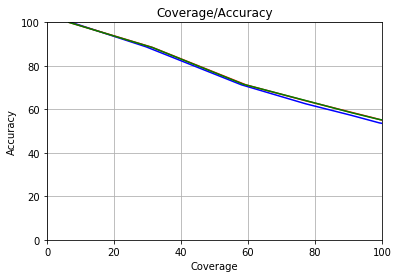

In [41]:
import matplotlib.pyplot as plt

plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Coverage/Accuracy')
plt.plot(resC, resA, 'b-', resC12, resA12, 'r-', resC13, resA13, 'g-')
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.show()

# 5gram from NGram set + 5gram from disamed dataset

In [11]:
N5GRAMS_FILE = "data/ngrams/filtered_n5grams.tsv"

In [12]:
n5grams =  load_ngrams(N5GRAMS_FILE)
print(len(n5grams))

340618


In [17]:
n5grams_data = [(row[0] + row[1] + row[3] + row[4], row[2]) for row in n5grams]

import random
random.shuffle(n5grams_data)
random.shuffle(disamed_data)

test = n5grams_data[:len(n5grams_data)/10] + [(row[0], row[1][1]) for row in disamed_data[:len(disamed_data)/10]]
train = n5grams_data[len(n5grams_data)/10:] + [(row[0], row[1][1]) for row in disamed_data[len(disamed_data)/10:]]
print("Train set length: %s\nTest set length: %s" % (len(train), len(test)))

Train set length: 326593
Test set length: 36287


In [18]:
X = [row[0] for row in train]
Y = [row[1] for row in train]

In [19]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(220), random_state=1)

clf.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=220, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [20]:
val = [(row[0], row[1]) for row in disamed_data[:len(disamed_data)/10]]

In [21]:
err, lenX, lenA = testit_val_with_h(val, clf, 1)
print("%s\t%s\t%s" % (err, lenX, lenA))
if lenA > 0:
    print('Accuracy (h=1): %2.f%%' % ((lenA - err) * 100./lenA))
    print('Coverage (h=1): %2.f%%' % (lenA * 100./lenX))
err, lenX, lenA = testit_val_with_h(val, clf, 3)
print("%s\t%s\t%s" % (err, lenX, lenA))
if lenA > 0:
    print('Accuracy (h=3): %2.f%%' % ((lenA - err) * 100./lenA))
    print('Coverage (h=3): %2.f%%' % (lenA * 100./lenX))
err, lenX, lenA = testit_val_with_h(val, clf, 5)
print("%s\t%s\t%s" % (err, lenX, lenA))
if lenA > 0:
    print('Accuracy (h=5): %2.f%%' % ((lenA - err) * 100./lenA))
    print('Coverage (h=5): %2.f%%' % (lenA * 100./lenX))

0	2226	81
Accuracy (h=1): 100%
Coverage (h=1):  4%
378	2226	1280
Accuracy (h=3): 70%
Coverage (h=3): 58%
895	2226	2016
Accuracy (h=5): 56%
Coverage (h=5): 91%


In [22]:
resA2, resC2 = acc_cover(val, clf)

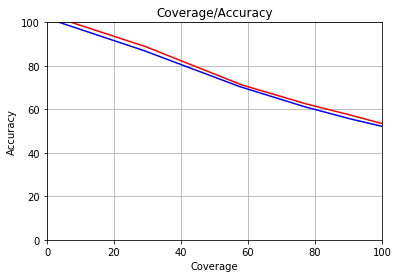

In [23]:
import matplotlib.pyplot as plt

plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Coverage/Accuracy')
plt.plot(resC, resA, 'r-', resC2, resA2, 'b-')
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.show()

# 4Gram disamed set

In [42]:
disamed_data = []
for row in rawdata:
    disamed_data.append((row[2] + row[4] + row[5], row[3]))

In [43]:
import random
random.shuffle(data)

test = disamed_data[:len(disamed_data)/10]
train = disamed_data[len(disamed_data)/10:]
print("Train set length: %s\nTest set length: %s" % (len(train), len(test)))

Train set length: 20036
Test set length: 2226


In [44]:
X = [row[0] for row in train]
Y = [row[1][1] for row in train]

In [45]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(106), random_state=1)

clf.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=106, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [46]:
resA41, resC41 = acc_cover(test, clf)

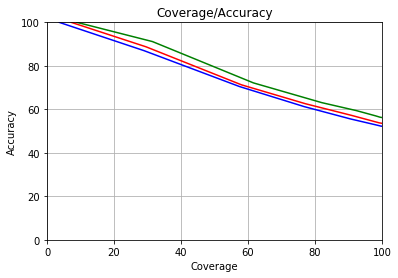

In [48]:
import matplotlib.pyplot as plt

plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Coverage/Accuracy')
plt.plot(resC, resA, 'r-', resC2, resA2, 'b-', resC41, resA41, 'g-')
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.show()